<a href="https://colab.research.google.com/github/mehraanjali/Demonstration_of_various_Machine_learning_Models/blob/main/Demonstration_of_various_Machine_learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Regression**

In [ ]:
def estimate_coeff(x,y):
  #num of observations/points
  n=np.size(x)

  #mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

  #calculating cross deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  #calcuating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return(b_0,b_1)

def plot_regression_line(x,y,b):
  #plottng the actual points as scatter plot
  plt.scatter(x,y,color='m',marker='o',s=30)

  #predicting response vector
  y_pred = b[0]+b[1]*x

  #plotting the regression line
  plt.plot(x,y_pred,color = 'g')

  #putting labels
  plt.xlabel('x')
  plt.ylabel('y')

  #function to show plot
  plt.show()

def main():
  #observations/data
  x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
  y = np.array([1,3,2,5,7,8,8,9,10,12,15,16,18])

  #estimating coefficients
  b = estimate_coeff(x,y)
  print('estimated coefficients:\nb_0={} \nb_1={}'.format(b[0],b[1]))

  #plotting regression line
  plot_regression_line(x,y,b)

if __name__=='__main__':
  main()

NameError: ignored

## **Multiple Regression**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics

#load the boston dataset
#boston = datasets.load_boston(return_X_y=False)

#from sklearn.datasets import fetch_california_housing
df = pd.read_csv('/content/E-com_Data.csv')
df
#housing = fetch_california_housing()

from sklearn import preprocessing
l1 = preprocessing.LabelEncoder()
df['CustomerID']=l1.fit_transform(df['CustomerID'])
df['Item Code']=l1.fit_transform(df['Item Code'])
df['InvoieNo']=l1.fit_transform(df['InvoieNo'])
df['Date of purchase']=l1.fit_transform(df['Date of purchase'])
df['Quantity']=l1.fit_transform(df['Quantity'])
df['Time']=l1.fit_transform(df['Time'])
df['price per Unit']=l1.fit_transform(df['price per Unit'])

#defining feature matrix(X) and response vector(y)
X = df[['CustomerID', 'Item Code','InvoieNo','Date of purchase','Quantity','Time','price per Unit']]
y = df['Price']


In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

#create linear regression object
reg = linear_model.LinearRegression()

#train the model using the training sets
reg.fit(X_train, y_train)

#regression coefficients
print('Coefficients: ',reg.coef_)

#variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

#plot for residual error

##setting plot style
plt.style.use('fivethirtyeight')

##plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')

##plaoting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test)- y_test, color = "blue", s = 10, label = 'Test data')

##plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50000, linewidth =2)

# plotting legend
plt.legend(loc='upper right')

#plotting titles
plt.title('Residual error')

plt.show

## **Polynomial Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load datasets
data = pd.read_csv('/content/Ecommerce Customers.csv', low_memory = False)
data.shape
data.columns

#Data Preprocessing to get only the useful data out of the whole dataset
data1 = data[['Time on App','Yearly Amount Spent']]
data1.head()


In [ ]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,1].values

#Dividing the data into parts for training and testing
print("Initial Plot")
plt.scatter(X,y, color='red')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#fitting the regression model using sklearn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)

print(X_poly)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_poly, y_train)

accuracy = regressor.score(poly_reg.transform(X_test), y_test)

print("Accuracy : ", accuracy)

# Visualizing the data

print("Polynomial Plot")
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(poly_reg.transform(X_test)))
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()


# **K Means Clustering**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Loading Datasets

df = pd.read_csv('/content/MDS_Mall_Customers.csv')
X = df.iloc[:,[3,4]].values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (Rs.)     200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

In [ ]:
# Elbow chart to find optimum number of clusters to find the values of k

from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# inertia_list = []
# for i in range(1,9):
#   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#   kmeans.fit(X)
#   inertia_list.append(kmeans.inertia_)
# plt.plot(range(1,9),inertia_list)
# plt.title('Inertia_list vs no. of clusters')
# plt.xlabel('Number of clusters')
# plt.ylabel('inertia_list')
# plt.show()



NameError: ignored

In [ ]:
#Clustering prediction
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state=0)
y = kmeans.fit_predict(X)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

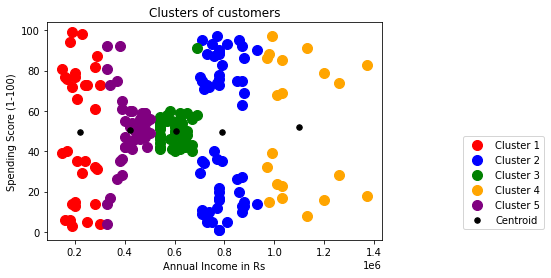

In [ ]:
#Visualization of clusters

plt.scatter(X[y==0,0], X[y==0,1], s=100, c='red', label='Cluster 1')
#x axis value, y axis value, size , color
plt.scatter(X[y==1,0], X[y==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=100, c='Orange', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=100, c='Purple', label='Cluster 5')
# plt.scatter(X[y==5,0], X[y==5,1], s=100, c='Yellow', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=30, c='Black', label='Centroid')
plt.title('Clusters of customers')
plt.xlabel("Annual Income in Rs")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor =(1.5,0.5))
plt.show()


In [ ]:
X[y==3,0]

# **Logistic Regression** (Explained)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

datasets = pd.read_csv("/content/Social_Network_Ads - Social_Network_Ads.csv")

In [ ]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
datasets.shape

(400, 5)

In [ ]:
datasets.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
X = datasets.iloc[:,[2,3]].values
Y = datasets.iloc[:,4].values

In [ ]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
Y.shape

(400,)

In [ ]:
#splitting the dataset into the training and testing set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [ ]:
X_Train.shape

(300, 2)

In [ ]:
X_Test.shape

(100, 2)

In [ ]:
Y_Train.shape

(300,)

In [ ]:
Y_Test.shape

(100,)

In [ ]:
datasets.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
print(X_Train[:10])
print('--'*20)
print(X_Test[:10])
print('--'*20)
print(Y_Train[:10])
print('--'*20)
print(Y_Test[:10])
print('--'*20)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]
----------------------------------------
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]
----------------------------------------
[0 1 0 1 1 1 0 0 0 0]
----------------------------------------
[0 0 0 0 0 0 0 1 0 0]
----------------------------------------


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
print(X_Train[:5])
print('--'*20)
print(X_Test[:5])
print('--'*20)
print(Y_Train[:10])
print('--'*20)
print(Y_Test[:10])
print('--'*20)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
----------------------------------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]
----------------------------------------
[0 1 0 1 1 1 0 0 0 0]
----------------------------------------
[0 0 0 0 0 0 0 1 0 0]
----------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [ ]:
Y_Pred = classifier.predict(X_Test)

In [ ]:
print(Y_Pred[:20])
print('--'*20)
print(Y_Test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
----------------------------------------
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
#Accuracy

from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, Y_Pred)
print("Accuracy", acc*100, "%")

Accuracy 89.0 %


In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[65,  3],
       [ 8, 24]])

In [ ]:
T

NameError: ignored

In [ ]:
#Heat MAtrix

sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [ ]:
X1.shape

(592, 616)

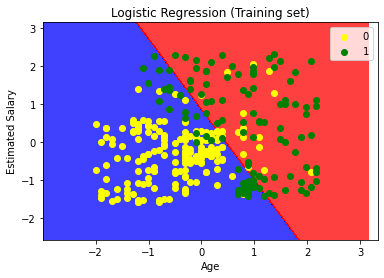

In [ ]:
#for visualizing the training set results
from matplotlib.colors import ListedColormap
X_set,Y_set=X_Train,Y_Train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('blue','red')))

plt.xlim(X1.min(),X2.max())
plt.ylim(X2.min(),X1.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1], c= ListedColormap(('yellow','green'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **K Nearest**

In [ ]:
from mlxtend.plotting import plot_decision_regions
#A library consisting of useful tools and extensions for the day-to-day data science task.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/diabetes.csv')

OSEMN Pipeline
O - Obtaining our data
S - Scrubbing / Cleaning our data
E - Exploring / Visualizing our data will allow us to find patterns and trends
M - Modeling our data will give us our predictive power as a wizard
N - INterpreting our data

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/diabetes - diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# to know the columns
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# to know the shape
diabetes_data.shape

(768, 9)

Basic EDA and statistical analysis

In [ ]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


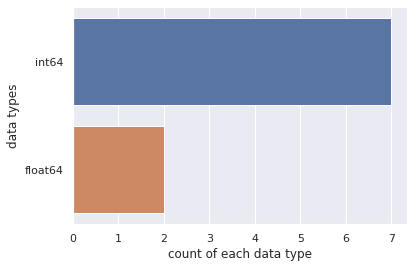

In [ ]:
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

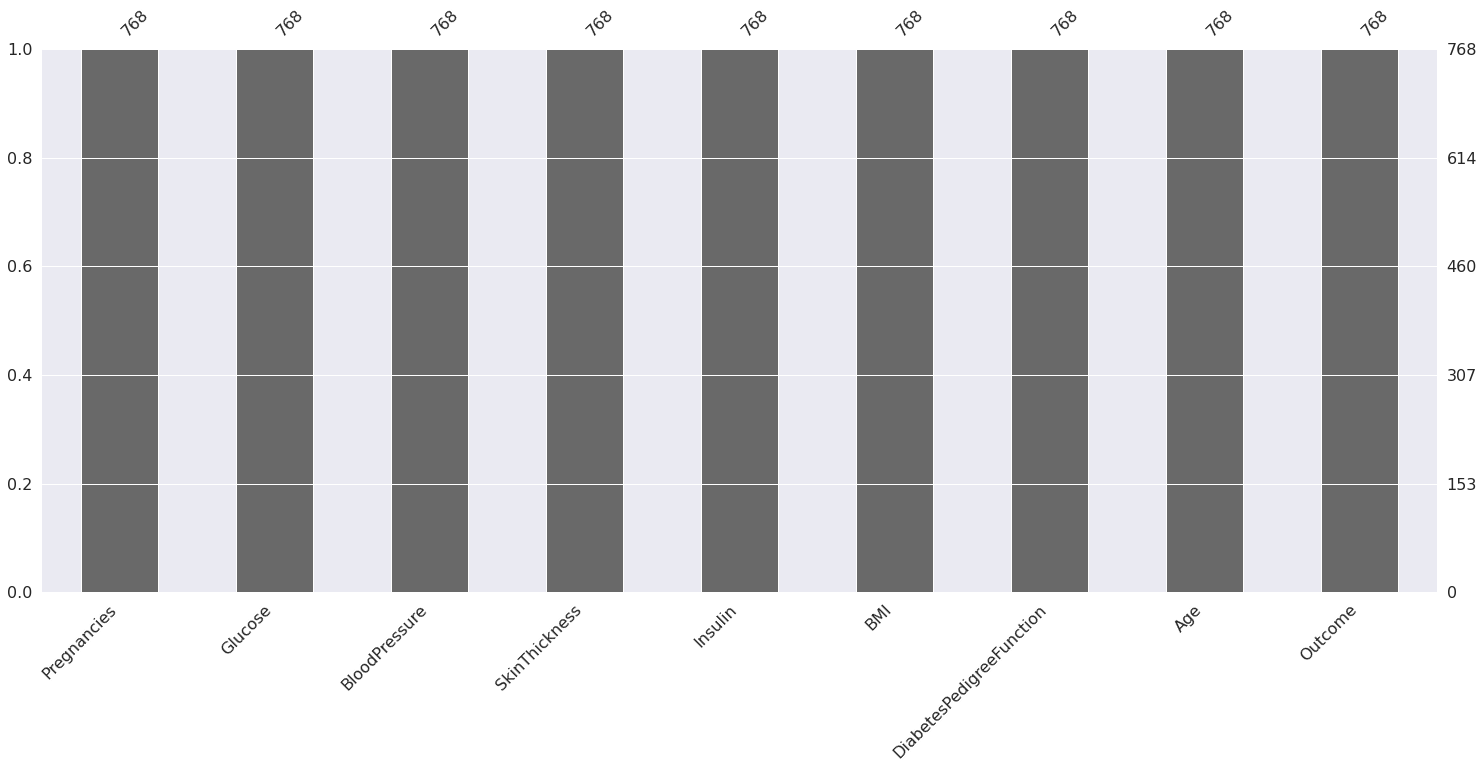

In [ ]:
import missingno as msno
p=msno.bar(diabetes_data)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data_copy = diabetes_data.copy(deep = True) #deep=true means, any changes to the copied dataset is not affected to the original
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
diabetes_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


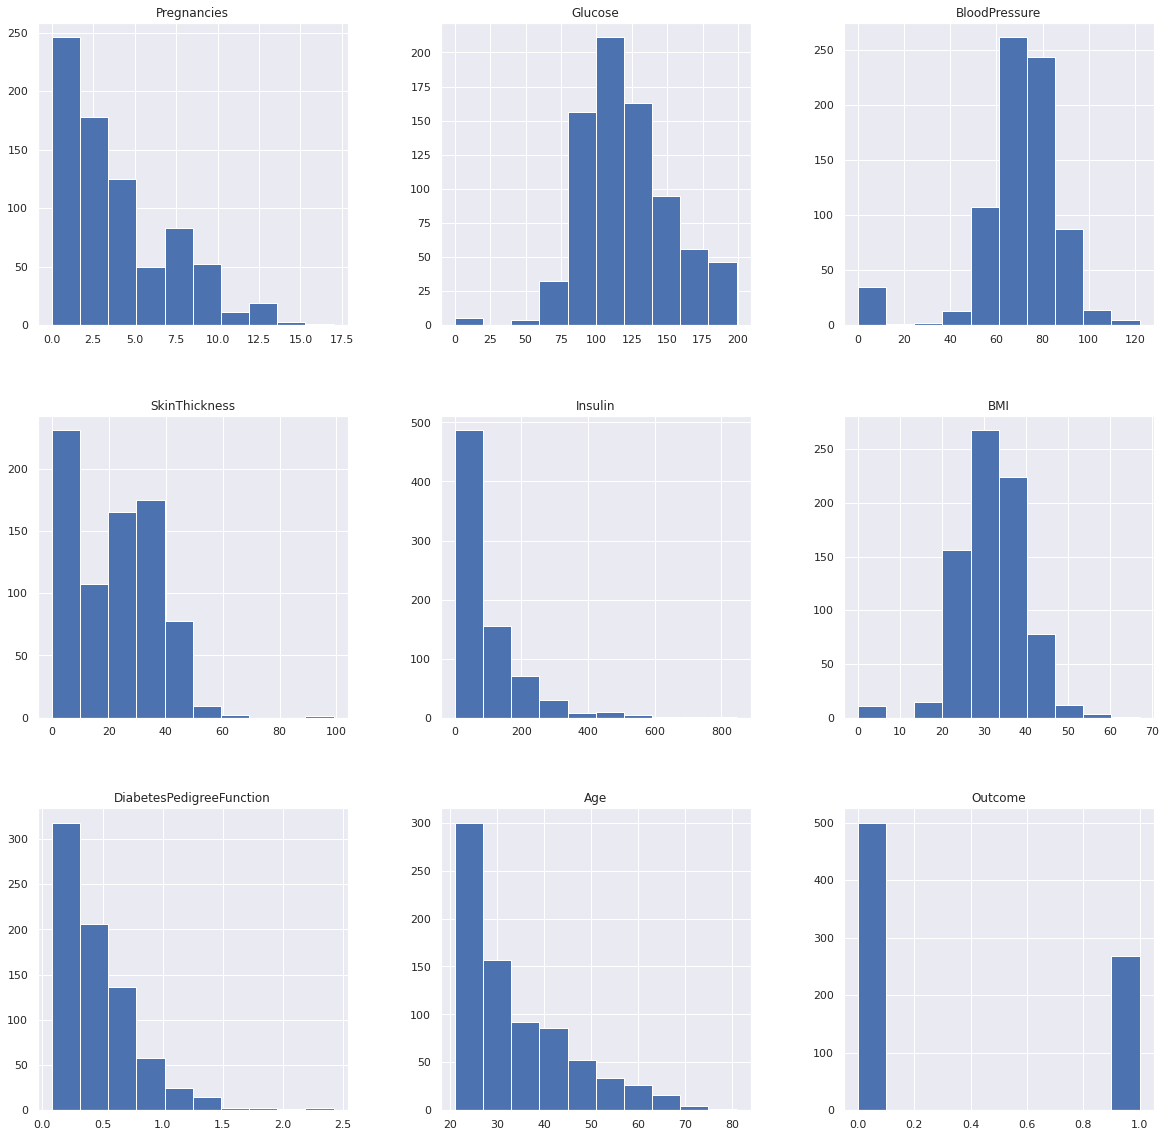

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [ ]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [ ]:
diabetes_data_copy.shape

(768, 9)

In [ ]:
diabetes_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


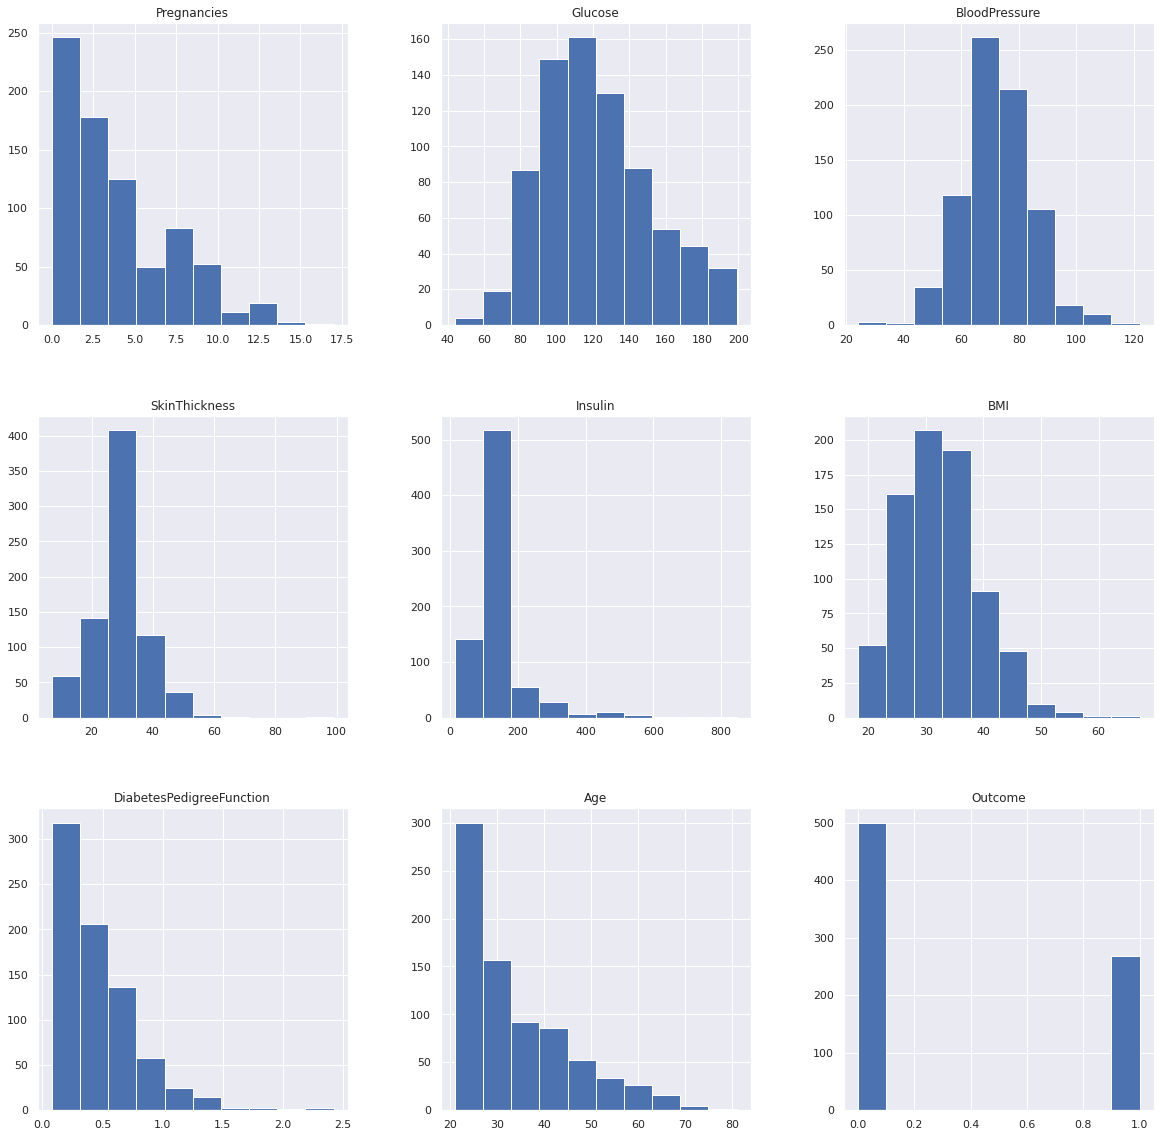

In [ ]:
p = diabetes_data_copy.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


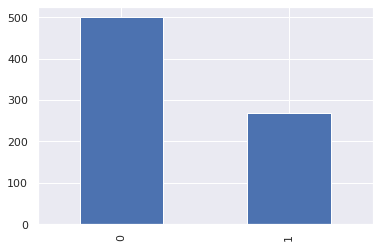

In [ ]:
# color_wheel = {}
# colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
# print(colors)
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

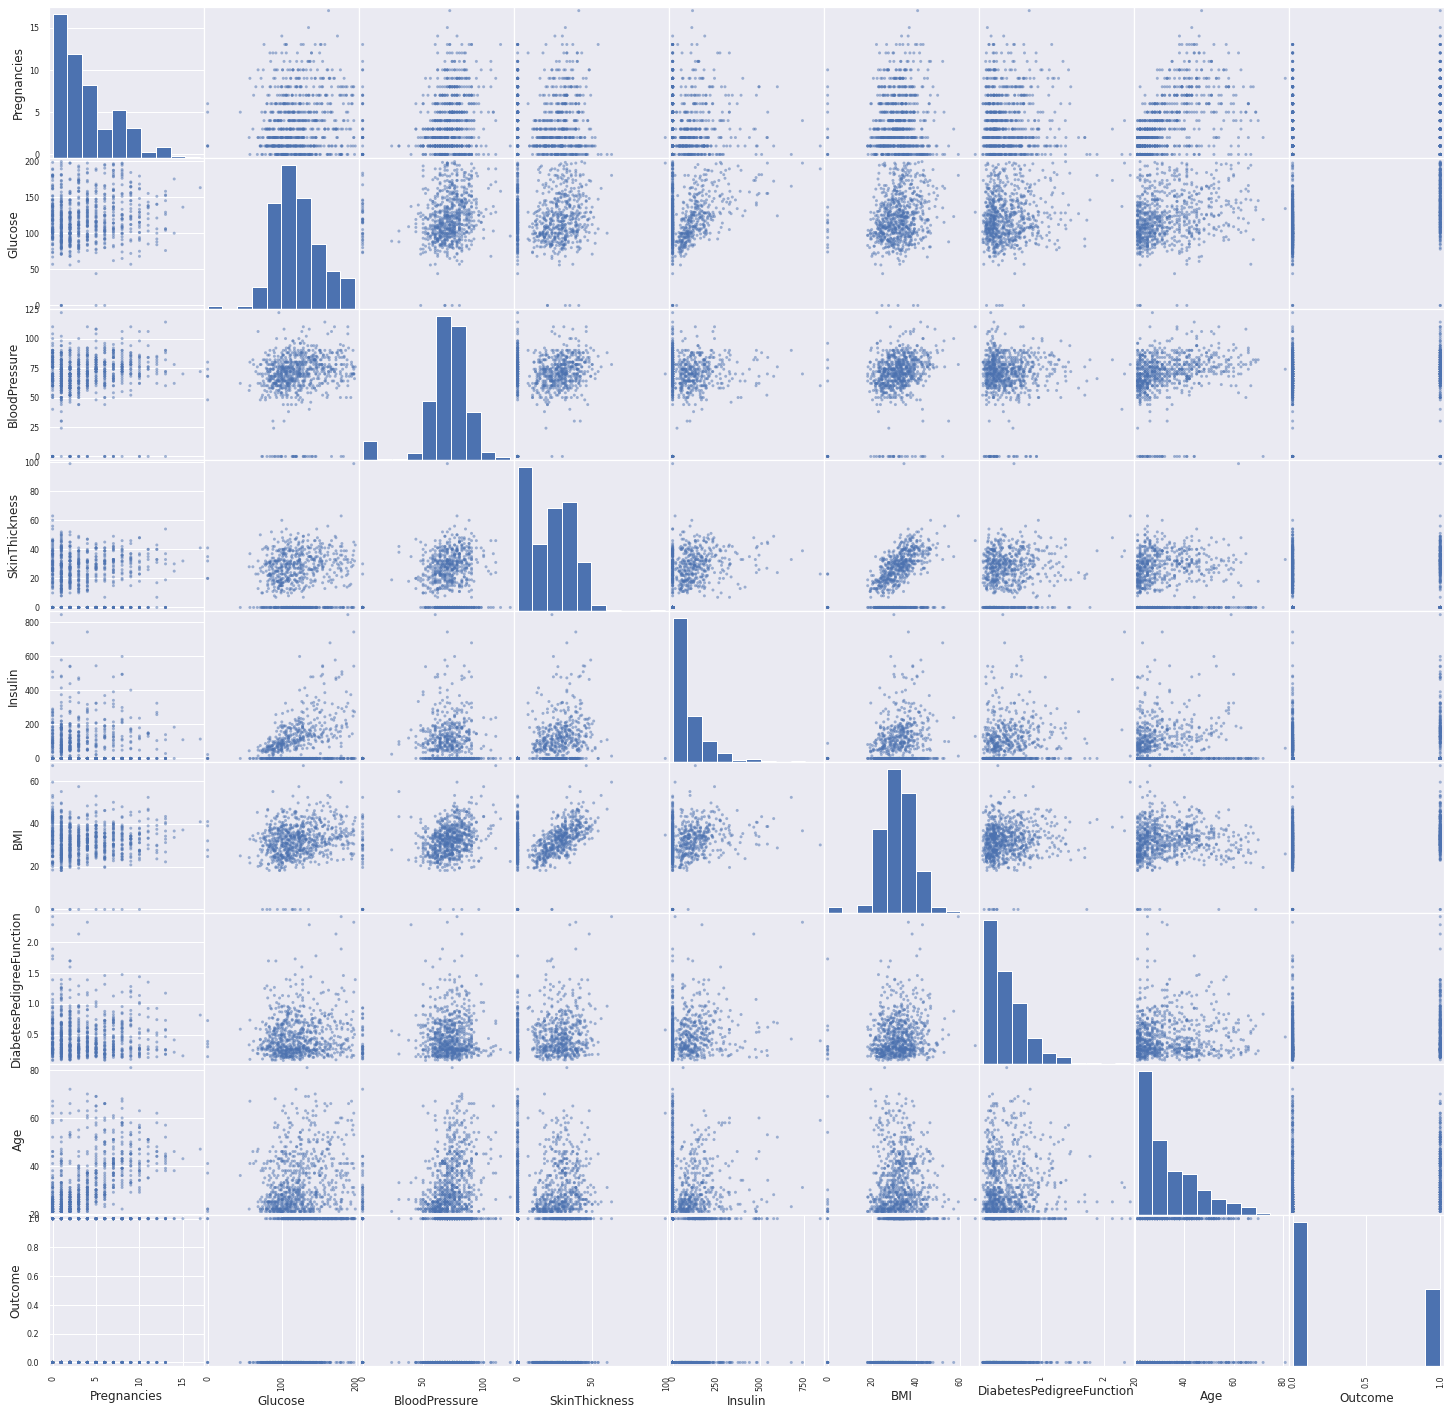

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

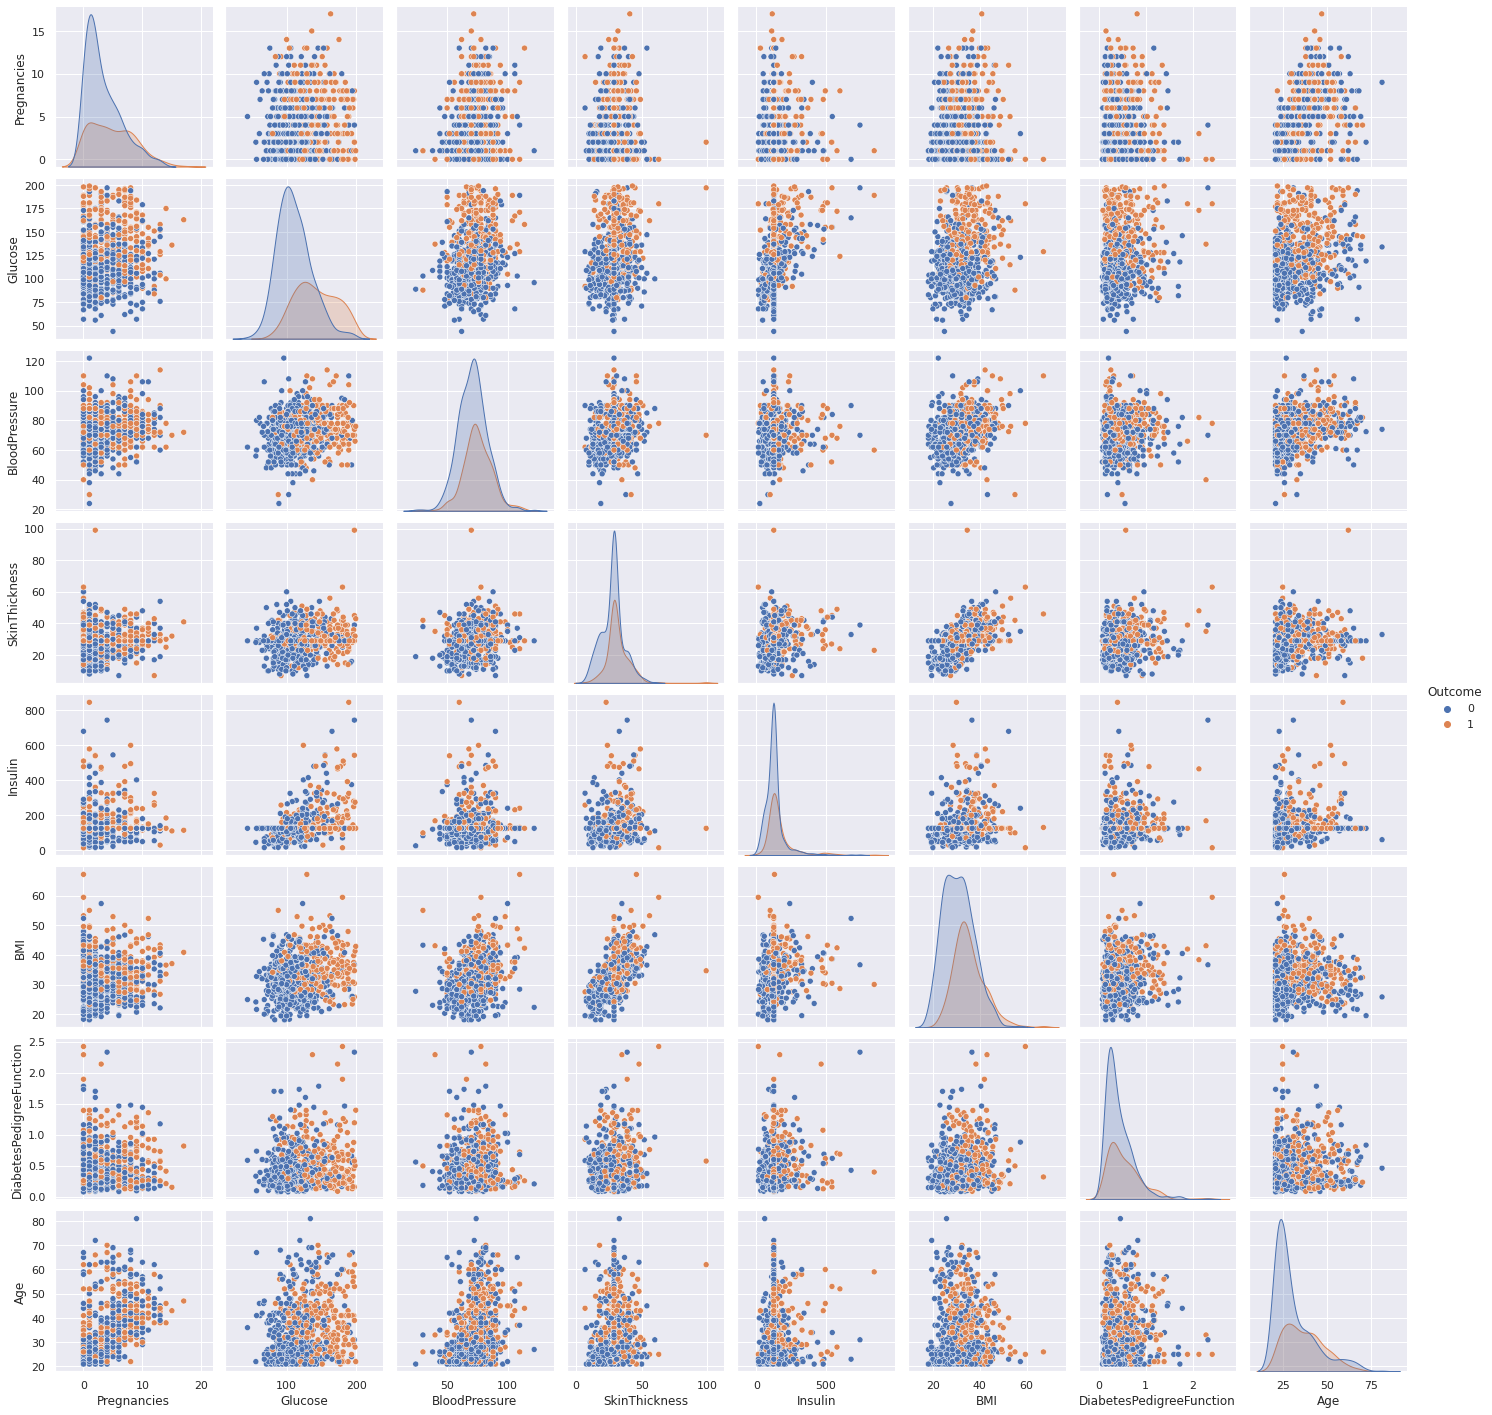

In [ ]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')#hue is used for colour

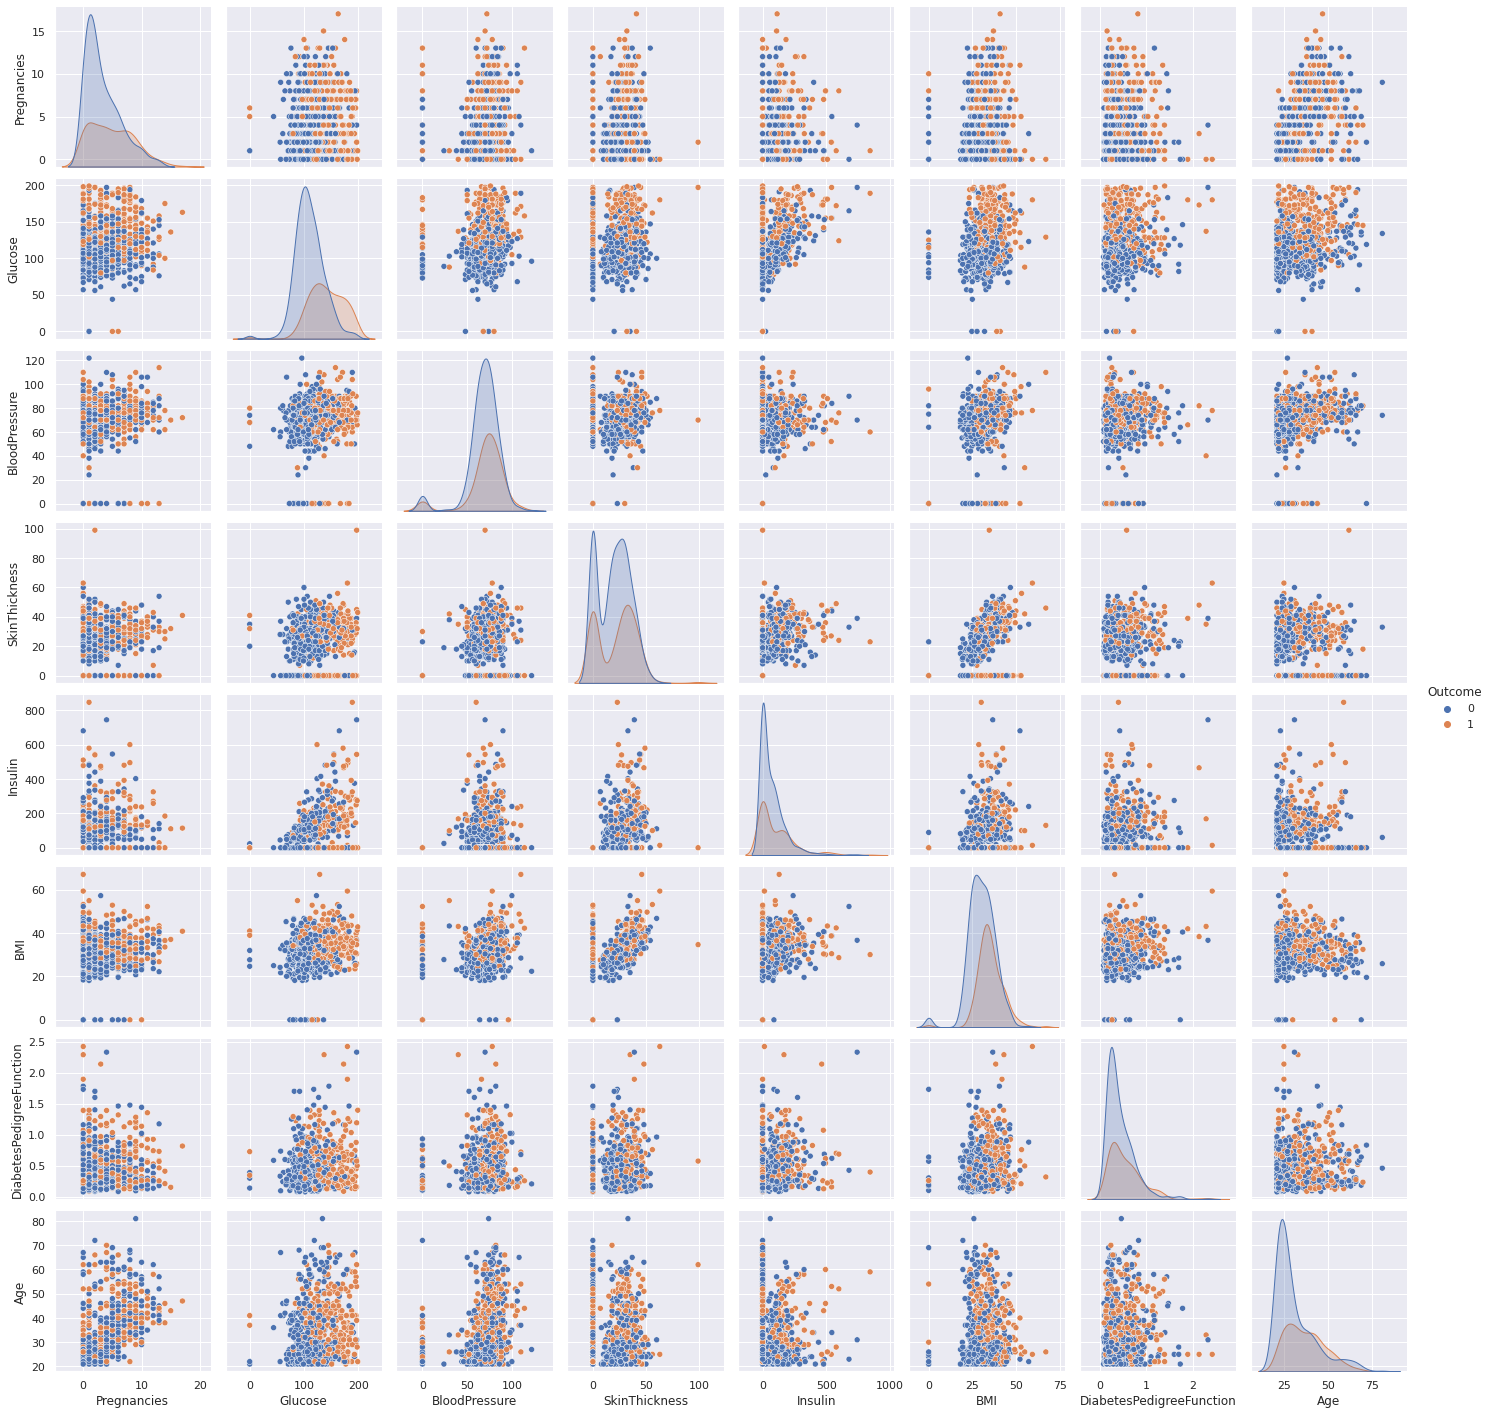

In [ ]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

Heatmap for unclean data

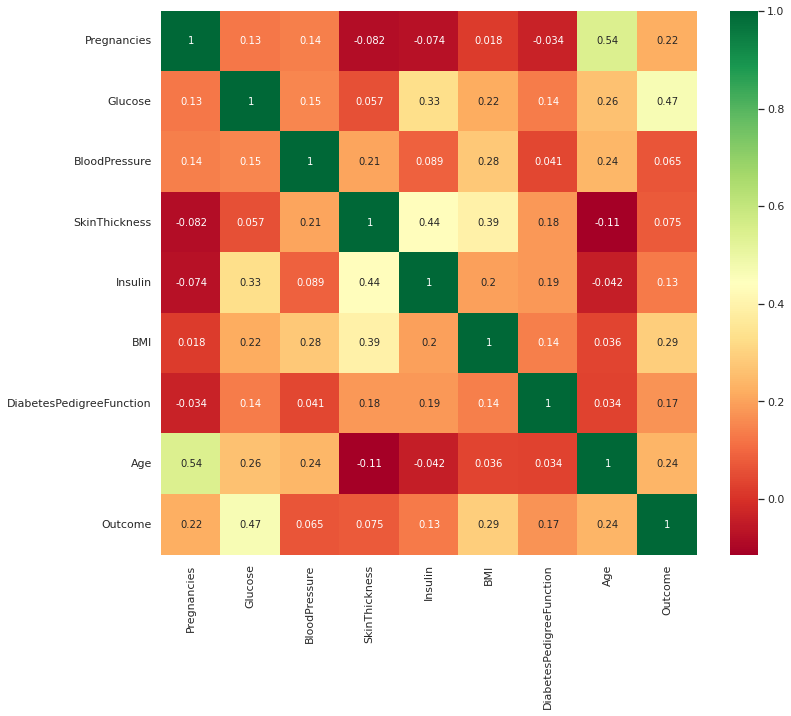

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmap of Cleaned Data

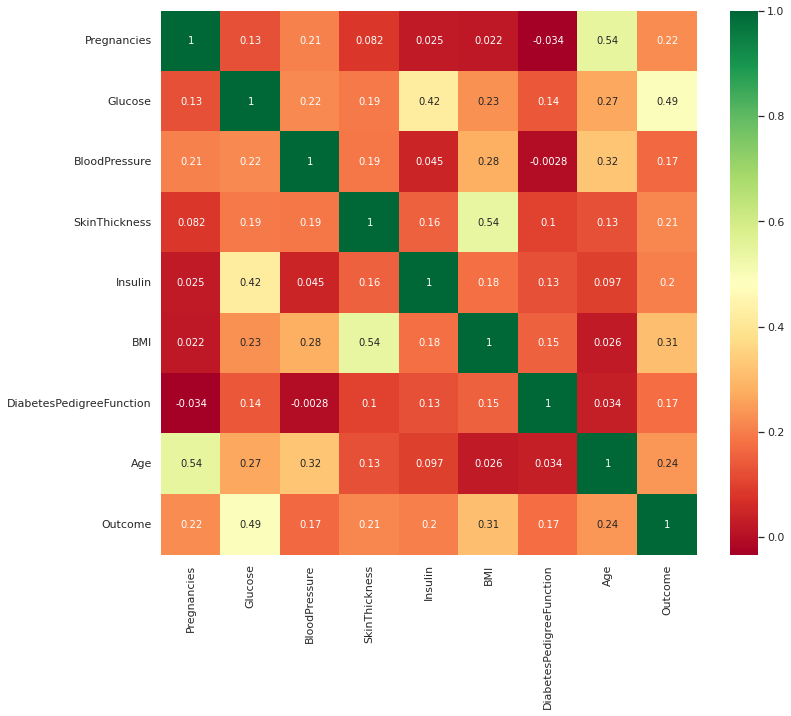

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = diabetes_data_copy.Outcome

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


Result Visualization

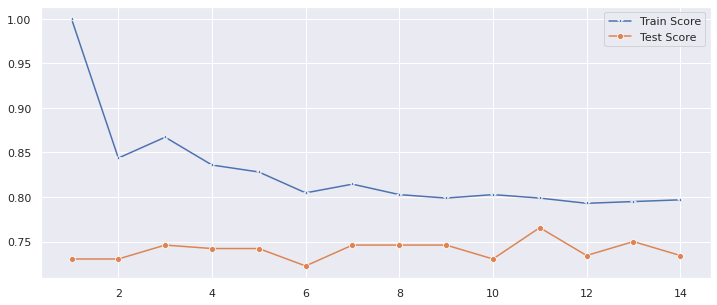

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

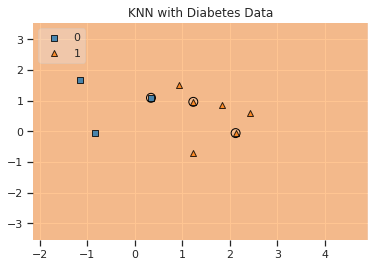

In [ ]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()